## Notebook to do exploratory data analysis on the current dataset. Use the dropdowns to play with the data

In [1]:
!pip install geopandas pandas tqdm descartes mapclassify plotly ipywidgets folium statsmodels

In [2]:
import geopandas as gpd
import pandas as pd
from tqdm import tqdm

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output

import folium

from collections import OrderedDict

years = [el for el in range(2011,2022)]
months = [el+1 for el in range(12)]


df = gpd.GeoDataFrame(pd.read_pickle('./data/dataset_v1.0_with_ts.pkl'), crs="EPSG:4326")
df['id'] = df.apply(lambda x : str(x.name), axis=1)

#df.columns
variables = ['PrR', 'maxPrR', 'Eva', 'maxEva', 'Hum',
       'maxHum', 'Ws1', 'maxWs1', 'T', 'maxT', 'Vap', 'maxVap', 'Vpd',
       'maxVpd', 'PrA', 'maxPrA', 'PrO', 'maxPrO', 'Pres', 'maxPres', 'Soil',
       'maxSoil', 'SoilT', 'maxSoilT', 'ACLED_Strategic_developments',
       'ACLED_total', 'ACLED_Explosions/Remote_violence',
       'ACLED_Violence_against_civilians', 'ACLED_Battles', 'ACLED_Protests',
       'ACLED_Riots', 'IQ.CPA.GNDR.XQ',
       'SH.STA.WASH.P5', 'SP.RUR.TOTL', 'EG.ELC.ACCS.ZS', 'HD.HCI.OVRL',
       'SP.DYN.CBRT.IN', 'NY.GDP.PCAP.CD', 'SL.AGR.EMPL.ZS', 'SL.UEM.TOTL.ZS',
       'AG.YLD.CREL.KG', 'AG.LND.ARBL.ZS', 'SE.PRM.CMPT.ZS', 'SP.POP.TOTL',
       'IQ.CPA.TRAN.XQ', 'NE.EXP.GNFS.ZS', 'IQ.CPA.PADM.XQ', 'SP.DYN.LE00.IN',
       'SI.POV.GINI', 'NE.IMP.GNFS.ZS']


df

/opt/conda/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,year,month,country_ISO3,country_name,region_ISO3,region_name,PrR,geometry,maxPrR,Eva,...,ACLED_Battles_06,ACLED_Battles_12,ACLED_Protests_01,ACLED_Protests_03,ACLED_Protests_06,ACLED_Protests_12,ACLED_Riots_01,ACLED_Riots_03,ACLED_Riots_06,ACLED_Riots_12
0,2011,1,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.000000,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",0.000000,0.931502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,2,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.005258,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",1.200000,0.884135,...,NaN,NaN,0.0,NaN,NaN,NaN,1.5,NaN,NaN,NaN
2,2011,3,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.020475,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",3.700000,0.802958,...,NaN,NaN,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,2011,4,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.250509,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",12.900000,0.824301,...,NaN,NaN,0.0,0.00,NaN,NaN,1.0,1.25,NaN,NaN
4,2011,5,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,1.120072,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",26.400002,1.690241,...,NaN,NaN,0.0,0.00,NaN,NaN,1.5,1.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,2021,8,TCD,Chad,TCD.23_1,Wadi Fira,1.938123,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",31.500000,2.225041,...,0.571429,0.384615,1.5,1.25,0.714286,0.384615,0.0,0.00,0.000000,0.000000
19796,2021,9,TCD,Chad,TCD.23_1,Wadi Fira,0.375758,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",16.600000,0.757520,...,0.571429,0.384615,0.0,1.25,0.714286,0.384615,0.0,0.00,0.000000,0.000000
19797,2021,10,TCD,Chad,TCD.23_1,Wadi Fira,0.278383,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",29.299999,0.445699,...,1.000000,0.615385,0.0,0.75,0.714286,0.384615,0.5,0.25,0.142857,0.076923
19798,2021,11,TCD,Chad,TCD.23_1,Wadi Fira,0.000000,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",0.000000,0.058644,...,2.000000,1.153846,0.0,0.00,0.714286,0.384615,0.5,0.25,0.142857,0.076923


In [3]:
df.to_csv('./data/dataset_v1.0_with_ts.csv')

In [4]:
from IPython.display import HTML, display

def plot_folium_map(df, variable, year, month):

    center = [df.centroid.x.mean(), df.centroid.y.mean()]
    zoom = 4

    mymap = folium.Map(center, zoom_start=zoom)

    
    data = df.loc[(df['year']==year) & (df['month']==month)]
    data = gpd.GeoDataFrame(data)
    data['pre'] = df[(df['year']==year if month != 1 else df['year']==(year-1)) & (df['month'] == month -1 if month>1 else df['month'] ==12)][variable].tolist()
    data['post'] = df[(df['year']==year if month != 12 else df['year']==(year +1)) & (df['month'] == month +1 if month < 12 else df['month'] ==1)][variable].tolist()
    
    
    myscale = (df[variable].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
    

    choropleth = folium.Choropleth(
     geo_data=data,
     data = data,
     columns = ['region_name', variable],
     key_on='feature.properties.region_name', #%s' % variable,
     name = '%s : %s' % (variable, '%s/%s' % (month, year)),
     fill_color='Reds',
     fill_opacity=.7,
     line_opacity=.5,
     highlight=True,
     legend_name='%s : %s' % (variable, '%s/%s' % (month, year)),
     reset=True,
     smooth_factor=0)

    mymap.add_child(choropleth)

        
    style_function = lambda x: {'fillColor': '#ffffff', 
                                'color':'#000000', 
                                'fillOpacity': 0.1, 
                                'weight': 0.1}
    highlight_function = lambda x: {'fillColor': '#000000', 
                                    'color':'#000000', 
                                    'fillOpacity': 0.50, 
                                    'weight': 0.1}
    layer = folium.features.GeoJson(
       data,
       style_function=style_function, 
       control=False,
       highlight_function=highlight_function, 
       tooltip=folium.features.GeoJsonTooltip(
            fields=['region_name', variable, 'pre', 'post'],
            aliases=['Region', variable, 'last month', 'next month'],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
       )
    )

    mymap.add_child(layer)
    mymap.keep_in_front(layer)
    folium.LayerControl().add_to(mymap)
    display(mymap)


In [5]:
def plot_folium_map2(df, variable, year, month, country, region):

    center = [df.centroid.x.mean(), df.centroid.y.mean()]
    zoom = 4

    mymap = folium.Map(center, zoom_start=zoom)

    data = df
    var = variable
    
    if year != None:
        data = data.loc[(data['year']==year)]
        
    if month != None:
        data = data.loc[(data['month']==year)]
    
    if year == None or month == None:
        data = data.groupby(['country_name', 'region_name']).aggregate(var=(variable,'mean')).reset_index()
        data = data.merge(df[['country_name','region_name','geometry']],how='inner', on=['country_name','region_name']).set_geometry('geometry').drop_duplicates()
        var = 'var'
       

    if country != None:
        data = data.loc[(data['country_name']==country)]
    if region != None:
        data = data.loc[(data['region_name']==region)]

    myscale = (data[var].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
       
    choropleth = folium.Choropleth(
     geo_data=data,
     data = data,
     columns = ['region_name', var],
     key_on='feature.properties.region_name', #%s' % variable,
     name = '%s' % (variable),
     fill_color='Reds',
     fill_opacity=.7,
     line_opacity=.5,
     highlight=True,
     legend_name='%s' % (variable),
     reset=True,
     smooth_factor=0)

    mymap.add_child(choropleth)
    
    style_function = lambda x: {'fillColor': '#ffffff', 
                                'color':'#000000', 
                                'fillOpacity': 0.1, 
                                'weight': 0.1}
    highlight_function = lambda x: {'fillColor': '#000000', 
                                    'color':'#000000', 
                                    'fillOpacity': 0.50, 
                                    'weight': 0.1}
    
    layer = folium.features.GeoJson(
       data,
       style_function=style_function, 
       control=False,
       highlight_function=highlight_function, 
       tooltip=folium.features.GeoJsonTooltip(
            fields=['region_name', var],
            aliases=['Region', variable],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
       )
    )

    mymap.add_child(layer)
    mymap.keep_in_front(layer)
    folium.LayerControl().add_to(mymap)
    display(mymap)

In [6]:
def dropdown_menu_widget(dataset):
    
    
    output = widgets.Output()

    
    dropdown_variable = widgets.Dropdown(options = variables, value=variables[-1], description='Variable:')
    dropdown_year = widgets.Dropdown(options = years, value=None, description='Year:')
    dropdown_month = widgets.Dropdown(options = months,value=None, description='Month:')
    dropdown_country = widgets.Dropdown(options = dataset['country_name'].unique(),value=None, description='Country:')
    dropdown_region = widgets.Dropdown(options = dataset['region_name'].unique(),value=None, description='Region:')
    
        
    def dropdown_variable_eventhandler(change):
        """
        Eventhandler for the state dropdown widget
        """
        display(input_widgets)
        variable_choice = change.new
        plot_folium_map2(dataset, variable_choice, dropdown_year.value, dropdown_month.value, dropdown_country.value, dropdown_region.value)
        IPython.display.clear_output(wait=True)            

    def dropdown_year_eventhandler(change):
        """
        Eventhandler for the question dropdown widget
        """
        display(input_widgets)
        year_choice = change.new
        plot_folium_map2(dataset, dropdown_variable.value, year_choice, dropdown_month.value, dropdown_country.value, dropdown_region.value)
        IPython.display.clear_output(wait=True)

    def dropdown_month_eventhandler(change):     
        """
        Event handler for the stratification dropdown widget
        """
        display(input_widgets)
        month_choice = change.new
        plot_folium_map2(dataset, dropdown_variable.value, dropdown_year.value, month_choice, dropdown_country.value, dropdown_region.value)
        IPython.display.clear_output(wait=True)
        
    def dropdown_country_eventhandler(change):     
        """
        Event handler for the stratification dropdown widget
        """
        display(input_widgets)
        country_choice = change.new
        plot_folium_map2(dataset, dropdown_variable.value, dropdown_year.value, dropdown_month.value, country_choice, dropdown_region.value)
        IPython.display.clear_output(wait=True)
        
    def dropdown_region_eventhandler(change):     
        """
        Event handler for the stratification dropdown widget
        """
        display(input_widgets)
        region_choice = change.new
        plot_folium_map2(dataset, dropdown_variable.value, dropdown_year.value, dropdown_month.value, dropdown_country.value, region_choice)
        IPython.display.clear_output(wait=True)
            
    dropdown_variable.observe(dropdown_variable_eventhandler, names='value')
    dropdown_year.observe(dropdown_year_eventhandler, names='value')
    dropdown_month.observe(dropdown_month_eventhandler, names='value')
    dropdown_country.observe(dropdown_country_eventhandler, names='value')
    dropdown_region.observe(dropdown_region_eventhandler, names='value')

    input_widgets = widgets.HBox([dropdown_variable, dropdown_year, dropdown_month, dropdown_country, dropdown_region])
    
      
    
    display(input_widgets)
    
    IPython.display.clear_output(wait=True)  

In [7]:
dropdown_menu_widget(df)


In [8]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



# Plot specific region trend
@interact
def plot_region_yearly_data(region=(df.region_name.unique()), variable=variables):
    
    
    df_filtered = df.loc[df['region_name']==region]
    df_filtered['date'] = df_filtered.apply(lambda x: datetime.datetime(x['year'],x['month'],1), axis=1)
    df_filtered.set_index('date', inplace=True)

    df_filtered[variable].plot(figsize=(20,10),xticks=df_filtered.index)



interactive(children=(Dropdown(description='region', options=('Boucle du Mouhoun', 'Cascades', 'Centre', 'Cent…

In [9]:
from matplotlib import pyplot
from matplotlib.colors import TwoSlopeNorm

@interact
def variable_trend(variable=variables, year=[2017,2018,2019]):
    # align colors
    vmin, vmax = df[variable].min(), df[variable].max()
    vcenter = (vmax-vmin)/2
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    cmap = 'Reds'
    cbar = pyplot.cm.ScalarMappable(norm=norm, cmap=cmap)


    fig, ax  = pyplot.subplots(3,4,figsize=(20,10))
    #fig, ax = plt.subplots(1, 1)

    for i in range(12):

        month = i+1

        df2 = df.loc[(df['year']==year) & (df['month']==month)]
        df2

        idx2 = i % 4 
        idx1 = 0 if i < 4 else 1 if i < 8 else 2

        df2.plot(figsize=(20,20), column=variable, cmap=cmap, ax=ax[idx1][idx2])
        ax[idx1][idx2].set_title('%02d-%s' % (month,str(year)))

interactive(children=(Dropdown(description='variable', options=('PrR', 'maxPrR', 'Eva', 'maxEva', 'Hum', 'maxH…

In [10]:
from matplotlib import pyplot
from matplotlib.colors import TwoSlopeNorm

import folium


@interact
def plot_variable_by_year_and_month( variable=variables, year=years, month=months):   
    df.loc[(df['year']==year) & (df['month']==month)].plot(figsize=(15,15), column=variable, cmap='Reds', legend=True )

interactive(children=(Dropdown(description='variable', options=('PrR', 'maxPrR', 'Eva', 'maxEva', 'Hum', 'maxH…

In [11]:
df

,year,month,country_ISO3,country_name,region_ISO3,region_name,PrR,geometry,maxPrR,Eva,...,ACLED_Battles_06,ACLED_Battles_12,ACLED_Protests_01,ACLED_Protests_03,ACLED_Protests_06,ACLED_Protests_12,ACLED_Riots_01,ACLED_Riots_03,ACLED_Riots_06,ACLED_Riots_12
0,2011,1,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.000000,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",0.000000,0.931502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,2,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.005258,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",1.200000,0.884135,...,NaN,NaN,0.0,NaN,NaN,NaN,1.5,NaN,NaN,NaN
2,2011,3,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.020475,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",3.700000,0.802958,...,NaN,NaN,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,2011,4,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.250509,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",12.900000,0.824301,...,NaN,NaN,0.0,0.00,NaN,NaN,1.0,1.25,NaN,NaN
4,2011,5,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,1.120072,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",26.400002,1.690241,...,NaN,NaN,0.0,0.00,NaN,NaN,1.5,1.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,2021,8,TCD,Chad,TCD.23_1,Wadi Fira,1.938123,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",31.500000,2.225041,...,0.571429,0.384615,1.5,1.25,0.714286,0.384615,0.0,0.00,0.000000,0.000000
19796,2021,9,TCD,Chad,TCD.23_1,Wadi Fira,0.375758,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",16.600000,0.757520,...,0.571429,0.384615,0.0,1.25,0.714286,0.384615,0.0,0.00,0.000000,0.000000
19797,2021,10,TCD,Chad,TCD.23_1,Wadi Fira,0.278383,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",29.299999,0.445699,...,1.000000,0.615385,0.0,0.75,0.714286,0.384615,0.5,0.25,0.142857,0.076923
19798,2021,11,TCD,Chad,TCD.23_1,Wadi Fira,0.000000,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",0.000000,0.058644,...,2.000000,1.153846,0.0,0.00,0.714286,0.384615,0.5,0.25,0.142857,0.076923


In [12]:
region = 'BFA.1_1'
year = 2021

df.date

0       2011-01-01
1       2011-02-01
2       2011-03-01
3       2011-04-01
4       2011-05-01
           ...    
19795   2021-08-01
19796   2021-09-01
19797   2021-10-01
19798   2021-11-01
19799   2021-12-01
Name: date, Length: 19800, dtype: datetime64[ns]

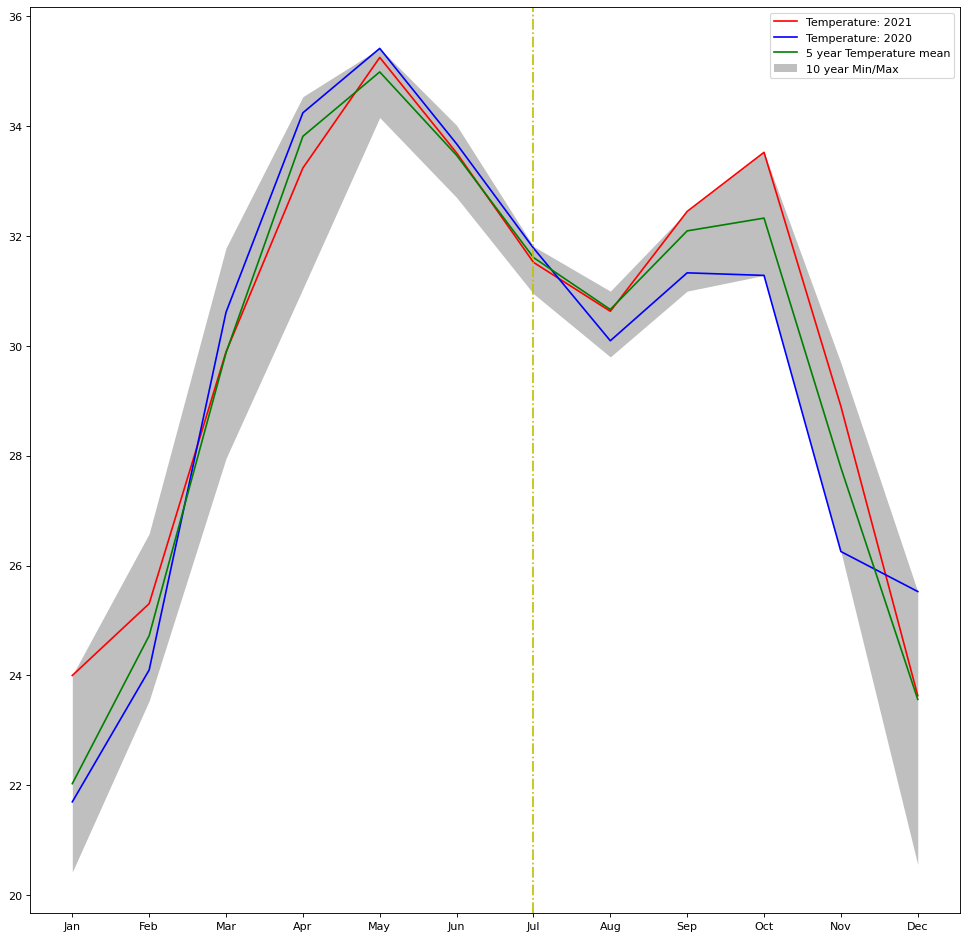

In [52]:

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


def plot_chart_part(variable, label):

    plt.figure(figsize=(15,15), dpi=80)
    t = df[(df.region_ISO3 == region) & (df.year == year)][variable]
    t1 = df[(df.region_ISO3 == region) & (df.year == year-1)][variable]
    t5 = df[(df.region_ISO3 == region) & (df.year <= year) & (df.year >= year - 5)].groupby('month')[variable].mean()

    t10min = df[(df.region_ISO3 == region) & (df.year <= year) & (df.year >= year - 10)].groupby('month')[variable].min()
    t10max = df[(df.region_ISO3 == region) & (df.year <= year) & (df.year >= year - 10)].groupby('month')[variable].max()


    x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

    plt.plot(x, t, 'r', label=f"{label}: {year}") # plotting t, a separately 
    plt.plot(x, t1, 'b', label=f"{label}: {year-1}") # plotting t, b separately 
    plt.plot(x, t5, 'g', label=f"5 year {label} mean") # plotting t, c separately 
    plt.fill_between(x,t10min,t10max, alpha=.5, linewidth=0, color='gray', label=f"10 year Min/Max")
    plt.axvline(dt.datetime.now().month, linestyle = '-.', color='y')
    plt.legend(loc="upper right")

    plt.show()
    
plot_chart_part('T', 'Temperature')

In [53]:
df.geometry

0        MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...
1        MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...
2        MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...
3        MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...
4        MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...
                               ...                        
19795    MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...
19796    MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...
19797    MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...
19798    MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...
19799    MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...
Name: geometry, Length: 19800, dtype: geometry

In [60]:
from datetime import datetime
import statsmodels.api as sm
import numpy as np

df['timestamp'] = df.apply(lambda x : 1000*datetime(year=x.year, month=x.month, day=1).timestamp(), axis=1).astype(int)
df

,year,month,country_ISO3,country_name,region_ISO3,region_name,PrR,geometry,maxPrR,Eva,...,ACLED_Battles_12,ACLED_Protests_01,ACLED_Protests_03,ACLED_Protests_06,ACLED_Protests_12,ACLED_Riots_01,ACLED_Riots_03,ACLED_Riots_06,ACLED_Riots_12,timestamp
0,2011,1,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.000000,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",0.000000,0.931502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1293840000000
1,2011,2,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.005258,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",1.200000,0.884135,...,NaN,0.0,NaN,NaN,NaN,1.5,NaN,NaN,NaN,1296518400000
2,2011,3,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.020475,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",3.700000,0.802958,...,NaN,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1298937600000
3,2011,4,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,0.250509,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",12.900000,0.824301,...,NaN,0.0,0.00,NaN,NaN,1.0,1.25,NaN,NaN,1301616000000
4,2011,5,BFA,Burkina Faso,BFA.1_1,Boucle du Mouhoun,1.120072,"MULTIPOLYGON (((-4.48801 11.79912, -4.48717 11...",26.400002,1.690241,...,NaN,0.0,0.00,NaN,NaN,1.5,1.75,NaN,NaN,1304208000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,2021,8,TCD,Chad,TCD.23_1,Wadi Fira,1.938123,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",31.500000,2.225041,...,0.384615,1.5,1.25,0.714286,0.384615,0.0,0.00,0.000000,0.000000,1627776000000
19796,2021,9,TCD,Chad,TCD.23_1,Wadi Fira,0.375758,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",16.600000,0.757520,...,0.384615,0.0,1.25,0.714286,0.384615,0.0,0.00,0.000000,0.000000,1630454400000
19797,2021,10,TCD,Chad,TCD.23_1,Wadi Fira,0.278383,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",29.299999,0.445699,...,0.615385,0.0,0.75,0.714286,0.384615,0.5,0.25,0.142857,0.076923,1633046400000
19798,2021,11,TCD,Chad,TCD.23_1,Wadi Fira,0.000000,"MULTIPOLYGON (((21.10800 14.12900, 21.08400 14...",0.000000,0.058644,...,1.153846,0.0,0.00,0.714286,0.384615,0.5,0.25,0.142857,0.076923,1635724800000


<ipython-input-68-e84964e3251b>:13: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(aggregated, model='additive', freq=12)


"\nplt.rcParams['figure.figsize'] = [9.0, 5.0]\nregression = pd.ols(y=aggregated['variable'], x=aggregated['date'])\n\ntrend = regression.predict(beta=regression.beta, x=x[20:]) # slicing to only use last 30 points\ndata = pd.DataFrame(index=df.date, data={'y': df['variable'], 'trend': trend})\ndata.plot()\n"

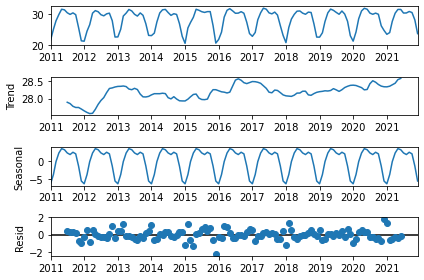

In [68]:
time_format = "%Y,%m,%d"

variable = 'T'


aggregated = pd.DataFrame(df.groupby(by=['timestamp']).aggregate('mean')[variable]).reset_index()
aggregated = aggregated.fillna('')
aggregated['date'] = aggregated.apply(lambda x: datetime.fromtimestamp(x.timestamp/1000), axis=1)
aggregated.drop(['timestamp'], axis=1, inplace=True)


aggregated = aggregated.set_index('date')
decomposition = sm.tsa.seasonal_decompose(aggregated, model='additive', freq=12)
pt = decomposition.plot()
pt

'''
plt.rcParams['figure.figsize'] = [9.0, 5.0]
regression = pd.ols(y=aggregated['variable'], x=aggregated['date'])

trend = regression.predict(beta=regression.beta, x=x[20:]) # slicing to only use last 30 points
data = pd.DataFrame(index=df.date, data={'y': df['variable'], 'trend': trend})
data.plot()
'''

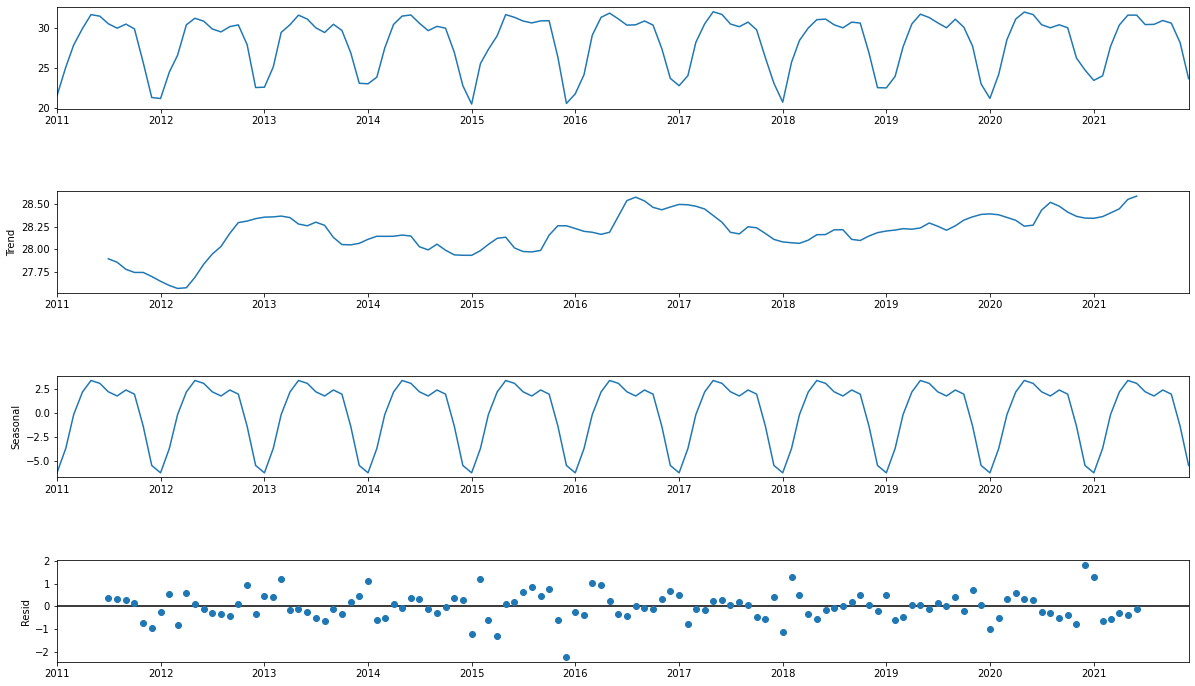

In [79]:
pt.set_size_inches(18.5, 10.5)
pt

In [67]:
df.columns

Index(['year', 'month', 'country_ISO3', 'country_name', 'region_ISO3',
       'region_name', 'PrR', 'geometry', 'maxPrR', 'Eva',
       ...
       'ACLED_Battles_12', 'ACLED_Protests_01', 'ACLED_Protests_03',
       'ACLED_Protests_06', 'ACLED_Protests_12', 'ACLED_Riots_01',
       'ACLED_Riots_03', 'ACLED_Riots_06', 'ACLED_Riots_12', 'timestamp'],
      dtype='object', length=187)